<a href="https://colab.research.google.com/github/mmilannaik/bostonhousepricing/blob/main/W28S5_Metrics_case_of_Imbalanced_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classfication Metrics

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F216167%2F477177%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240826%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240826T115453Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D109b3d0c90109dfd3b9c0786f7a849e842bb47dfc796b284d8bc9d00f7ad8b41ad0c96aa83b5151b17491c8e0147319fab19d3845bcc598b55bc4feac9e488e60b4c91f903cd4d2c4f32525fa96a3e1adbf1bfaacf6c9a191ffa583cbb9bf742d90d40279da1d998f315b730a373c85f98d0e0e03914555f027aa90190788f6ded525fe10ea845ad21e9c24657e2f4bbe91ab5f18592683157f85543598f6ac138f328af60414fd616721c0c8931ab2daeafd804fb2018cab3cf8dfe948a40672eacff331a0873fcf88f113eb59e7553c44f0375ca873dc472a55d703076192b30a0e3779ee9648850b76e1d4d05e807d7b911d860485d785322fceec8fca70b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 6325 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart.csv


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df = pd.read_csv('/kaggle/input/heart.csv')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [ ]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.8536585365853658
Accuracy of Decision Trees 0.9804878048780488


In [ ]:
confusion_matrix(y_test,y_pred1)

array([[82, 23],
       [ 7, 93]])

In [ ]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,82,23
1,7,93


In [ ]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,101,4
1,0,100


In [ ]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2

In [ ]:
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
637,1,1,1
735,1,1,1
612,0,0,0
241,0,1,0
818,1,1,1
194,0,0,0
615,1,1,1
473,1,1,1
412,0,0,0
853,0,0,0


In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [ ]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  82  23
1   7  93
--------------------------------------------------
Precision -  0.8017241379310345
Recall -  0.93
F1 score -  0.8611111111111112


In [ ]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred2))
print("Recall - ",recall_score(y_test,y_pred2))
print("F1 score - ",f1_score(y_test,y_pred2))

For DT Model
--------------------------------------------------
     0    1
0  101    4
1    0  100
--------------------------------------------------
Precision -  0.9615384615384616
Recall -  1.0
F1 score -  0.9803921568627451


In [ ]:
precision_score(y_test,y_pred1,average=None)

array([0.92134831, 0.80172414])

In [ ]:
# we can average or weighted score if we give average = 'macro' or 'weighted'

## Metrics in case of Imbalanced Data

 Accuracy score can be misleading in the context of imbalanced data because it does not provide a complete picture of the model's performance. In imbalanced datasets, where one class is significantly more prevalent than the others, a model that simply predicts the majority class for every instance can achieve a high accuracy score. However, this does not indicate that the model is effective in identifying the minority class or capturing the true underlying patterns in the data.

Consider an example where you have a dataset with 95% of instances belonging to class A and only 5% belonging to class B. If you train a model that always predicts class A, you will achieve 95% accuracy. However, this model completely fails to detect instances of class B, which may be the more critical class in certain applications, such as fraud detection or medical diagnosis.

 > Let's consider an example to demonstrate how accuracy can be unreliable in the context of imbalanced data. We'll use the popular scikit-learn library to build and evaluate a binary classification model.

 > In this example, we create an imbalanced dataset with 950 instances of the majority class (class 0) and only 50 instances of the minority class (class 1). We then split the data into training and testing sets, train a logistic regression model, and make predictions on the test set. Finally, we calculate and print various evaluation metrics.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


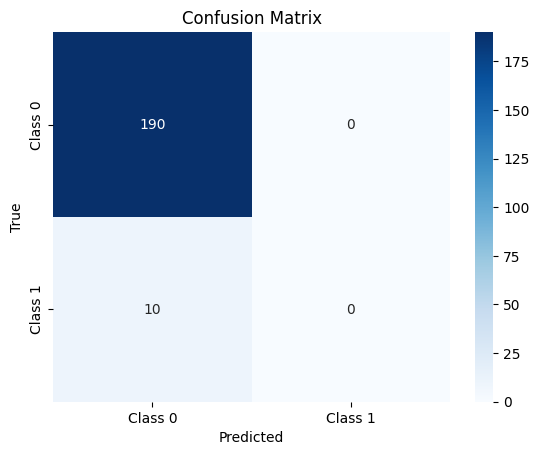

Accuracy: 0.95
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Generate imbalanced data
X = np.random.randn(1000, 5)  # Features
y = np.concatenate([np.zeros(950), np.ones(50)])  # Imbalanced target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
# Visualize confusion matrix
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.2f}")

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


If we run this code, we may observe misleading results in terms of accuracy due to the imbalanced nature of the data. The model may perform well in predicting the majority class but struggle to identify instances of the minority class.


Despite achieving a high accuracy of **0.95**, *none of the instances of the minority class (class 1) were correctly predicted*. The precision, recall, and F1-score for class 1 are all 0, indicating poor performance in capturing the minority class.

This example highlights how accuracy can be misleading in imbalanced datasets. It is crucial to consider additional evaluation metrics like precision, recall, and F1-score, which provide a more comprehensive understanding of the model's performance, particularly for the minority class.

# Happy Learning !